In [3]:
import pandas as pd
df=pd.read_csv('d:/data/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts() #0 정상거래, 1사기거래 카운트

0    284315
1       492
Name: Class, dtype: int64

In [5]:
train_cols=df.columns[1:30]
X=df[train_cols] #독립변수
y=df['Class'] #종속변수
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample = RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [7]:
df2['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [8]:
#샘플링 데이터셋에서 X,y구분
X=X_samp[train_cols]
y=y_samp['Class']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [10]:
#기본 SVM 모형
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
#예측 정확도 확인
print('학습용:{:6.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test,y_test)*100))

학습용: 73.06%
검증용: 78.17%


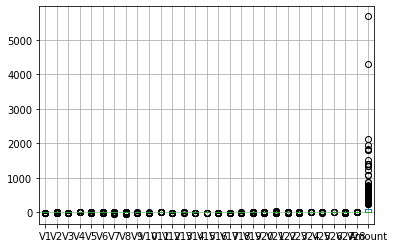

In [12]:
%matplotlib inline
X_train.boxplot()

In [15]:
a=np.array([10,20,50,80,-50,100,70]) #넘파이배열
print(np.max(a)) #최대값
print(np.where(a==100))
print(np.where(a==100)[0][0])

100
(array([5], dtype=int64),)
5


최적의 c: 1
최적의 gamma: 0.001
최적의 정확도: 0.9390862944162437


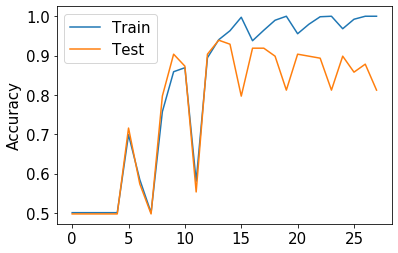

In [14]:
#최적의 cost,gamma 도출
import numpy as np
import matplotlib.pyplot as plt
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
c_values=[0.001,0.01,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1] #gamma values
for n in c_values: 
    for g in g_values:
        model=SVC(C=n, gamma=g, random_state=10) #svm모형
        model.fit(X_train,y_train) #기계학습
        #예측정확도를 리스트에 추가
        train_rate.append([n,g,model.score(X_train,y_train)])
        test_rate.append([n,g,model.score(X_test,y_test)])
        
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #최대값
idx=np.where(test_arr[:,2] == max_rate)[0][0] #최대값의 인덱스를 찾는 함수
print('최적의 c:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
#최적의 c:1
#최적의 gamma:0.001로 만든 svm 모형
model=SVC(random_state=10, C=1, gamma=0.001)
model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
#예측 정확도 확인
print('학습용:{:6.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test,y_test)*100))

학습용: 94.03%
검증용: 93.91%


In [18]:
#혼동행렬(오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['정상','사기'],
                  columns=['정상','사기'])
df_cm

,정상,사기
정상,95,3
사기,9,90
